
#### 👉Before you solve a Reinforcement Learning problem you need to define what are
- the actions
- the states of the world
- the rewards

#### 👉We are using the `CartPole-v0` environment from OpenAI's gym: https://github.com/openai/gym/wiki/CartPole-v0

#### 👉`CartPole-v0` is an easy environment because the action space is small, and the state space is large but finite.

#### 👉Environments with a finite number of actions and states are called tabular

#### Set up notebook
The use of magic and autoreloads will update when changes are detected in imported modules 

In [14]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#### Set up environment
There is a new version of GYM starting 2022 that is now opensourced but the enviornments are different
Learning the process of reinforced learning using deep mind will translate to teh real world well

In [1]:
import gym
env = gym.make('CartPole-v1', render_mode='human').env
print ("Action Space{}".format(env.action_space))
print ("State Space{}".format(env.observation_space))

Action SpaceDiscrete(2)
State SpaceBox([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


#### test environment
lets test some random samples for the environment and see the outcome

In [16]:
from tqdm import tqdm
from nn.agents import RandomAgent
agent = RandomAgent(env)
# For Plotting
timesteps_per_epoch = []
penalties_per_epoch = []
for i in tqdm(range (0, 100)):
    state = env.reset()
    epoch, penalties, reward, = 0,0,0
    done = False
    truncated = False
    
    
    while not done:
        action = agent.get_action(state)
        next_state, reward, terminated, truncated , info = env.step(action)
        done = truncated | terminated 
        if reward == -10:
            penalties += 1
        state = next_state
        epoch +=1
    timesteps_per_epoch.append(epoch)
    penalties_per_epoch.append(penalties)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.21it/s]


#### visulaize results


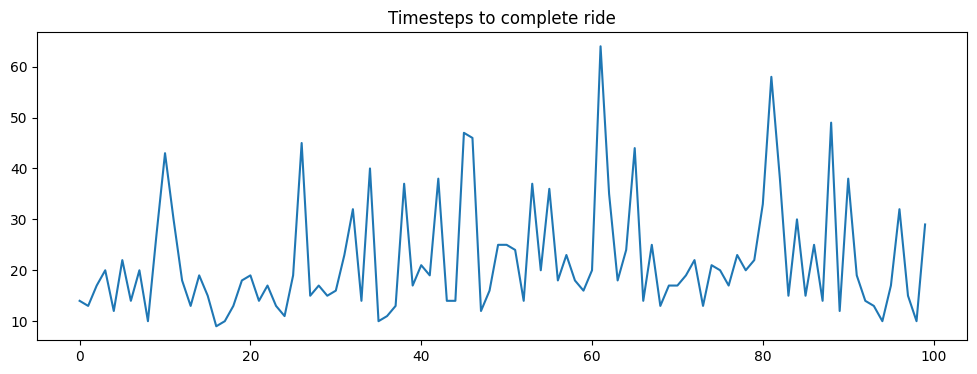

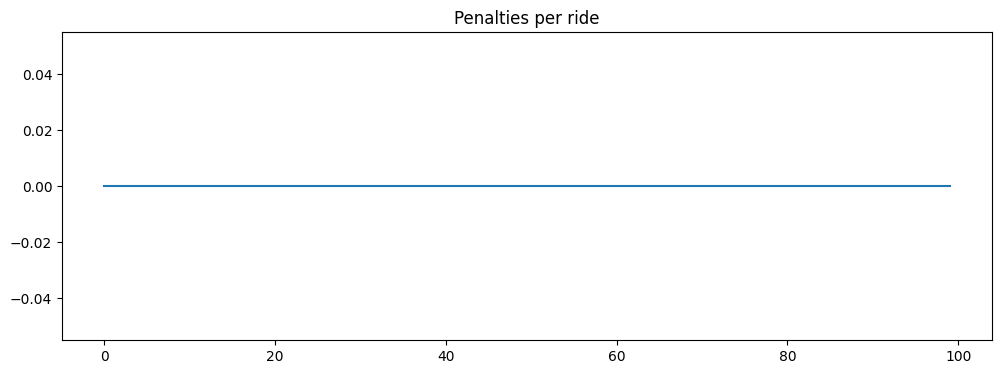

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Timesteps to complete ride")    
pd.Series(timesteps_per_epoch).plot(kind='line')
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Penalties per ride")    
pd.Series(penalties_per_epoch).plot(kind='line')
plt.show()

#### Lets train an Agent 
- make a neural network
- make agent to see how well the run was
  - reward the system for good
  - pentalize the system for bad
  

##### Neural Network class
Class takes in the amount of states:  
(states) - (Height)* depth - (actions)  


In [2]:
# import the necessary packages
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

class FullyConnected:
    @staticmethod
    def build(states, height, depth, actions):
        # initialize the model along with the input shape to be
        # # "channels last"
        model = Sequential()
        model.add(Flatten(input_shape = (1, states)))
        #build the amount of 
        for i in range(depth):                
            # define the first (and only) CONV => RELU layer
            model.add(Dense(height, activation='relu'))

        model.add(Dense(actions, activation='linear'))
        return model

##### Agent
We need an agent to:  
- train
- evaluate
- reward/pentalize